In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# 1. 读取数据集
try:
    df = pd.read_csv('flood_CHA.csv')
except FileNotFoundError:
    print("Error: flood_CHA.csv not found.")
    exit()

# 2. 提取关键数据并清洗
df_flood = df.copy()
df_flood = df_flood.dropna(subset=['Total Affected']).copy()
df_flood['Total Affected'] = df_flood['Total Affected'].astype(float)

# 转换为万人
df_flood['Total Affected'] = df_flood['Total Affected'] / 10000

# 过滤掉受灾人数为0的事件（如果您的关注点是大规模洪水事件）
df_flood = df_flood[df_flood['Total Affected'] > 0].copy()
data = df_flood['Total Affected'].values



拟合结果摘要:


d:\python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19975 (\N{CJK UNIFIED IDEOGRAPH-4E07}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


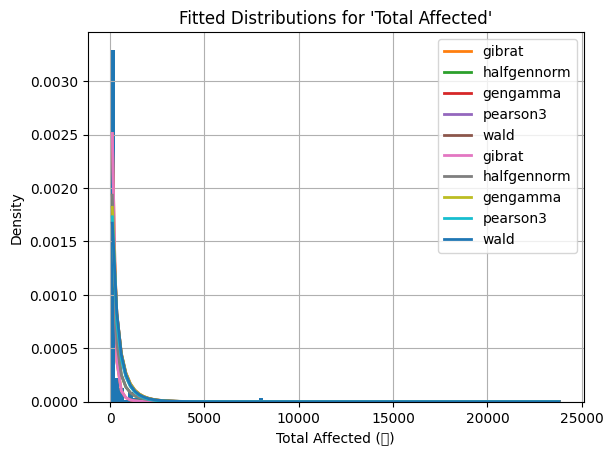


最佳拟合分布: gibrat
参数: (-24.106795605623212, 91.53535746656789)

所有分布拟合质量（按误差排序）:
                 sumsquare_error          aic          bic  kl_div  \
gibrat              6.539467e-07  4192.099352  4199.243661     inf   
halfgennorm         1.995659e-06  3309.410263  3320.126725     inf   
gengamma            2.719737e-06  4215.745150  4230.033766     inf   
pearson3            2.841441e-06  5471.926622  5482.643084     inf   
wald                3.175225e-06  4331.862213  4339.006521     inf   
...                          ...          ...          ...     ...   
levy_stable                  inf          inf          inf     inf   
vonmises_fisher              inf          inf          inf     inf   
kstwo                        inf          inf          inf     inf   
_fit                         inf          inf          inf     inf   
powernorm                    NaN  3876.323271  3887.039733     NaN   

                 ks_statistic     ks_pvalue  
gibrat               0.285702  1.7

In [21]:
from fitter import Fitter, get_common_distributions, get_distributions
distributions = ['gamma', 'lognorm', 'beta', 'burr', 'norm', 'expon', 'weibull_min', 'pareto']
f = Fitter(data,timeout=30)  # 设置超时时间，避免某些分布计算时间过长
# 进行拟合
f.fit()
# 5. 查看拟合结果
# 打印拟合结果的摘要
print("\n拟合结果摘要:")
f.summary()
# 绘制拟合结果的可视化
f.plot_pdf()
plt.title("Fitted Distributions for 'Total Affected'")
plt.xlabel("Total Affected (万)")
plt.ylabel("Density")
plt.show()
# 6. 获取最佳拟合分布
best_fit_name = list(f.get_best().keys())[0]
print(f"\n最佳拟合分布: {best_fit_name}")
# 获取最佳拟合分布的参数
best_params = f.fitted_param[best_fit_name]
print(f"参数: {best_params}")
# 7. 可选：打印所有分布的拟合质量（按误差排序）
print("\n所有分布拟合质量（按误差排序）:")
print(f.df_errors.sort_values('sumsquare_error'))

In [12]:
import numpy as np
from scipy.stats import beta
from scipy.optimize import curve_fit# 定义 Beta 分布的 PDF 函数（包含位置和尺度参数）
def beta_pdf(x, a, b, loc, scale):
    return beta.pdf(x, a, b, loc=loc, scale=scale)
# 获取直方图数据（用于拟合）
hist, bin_edges = np.histogram(data, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# 拟合 Beta 分布
params, _ = curve_fit(
    beta_pdf, 
    bin_centers, 
    hist, 
    p0=[0.3, 587, 0.0007, 339378]  # 使用 fitter 返回的初始参数
)
# 输出拟合参数
print("拟合参数 (a, b, loc, scale):", params)
# 计算理论 PDF 和直方图的平方偏差
predicted_pdf = beta_pdf(bin_centers, *params)
sse = np.sum((hist - predicted_pdf)**2)
print("平方偏差 (SSE):", sse)

拟合参数 (a, b, loc, scale): [ 9.35874786e+00  1.58885238e+05 -1.36184838e-01  7.62514344e+03]
平方偏差 (SSE): 43.07502070096552


In [16]:
import numpy as np
from scipy.stats import beta
# 使用 fitter 返回的参数
a, b, loc, scale = 0.3033, 587.9396, 0.0007, 339378.5966
# 生成理论 PDF（在数据范围内）
x = np.linspace(data.min(), data.max(), 1000)
theoretical_pdf = beta.pdf(x, a, b, loc=loc, scale=scale)
# 获取实际数据的直方图
hist, bin_edges = np.histogram(data, bins=1000, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# 计算平方偏差
predicted_pdf = beta.pdf(bin_centers, a, b, loc=loc, scale=scale)
sse = np.sum((hist - theoretical_pdf)**2)
print("平方偏差 (SSE):", sse)

平方偏差 (SSE): 20840.36429233756
